In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [7]:
df = pd.read_csv("ecommerce_orders_dataset.csv")
df.drop(["OrderID","Category","PaymentMethod"],axis=1,inplace=True)
df

,CustomerAge,OrderAmount,Quantity,DeliveryTime_Days,CustomerRating
0,52,14314,9,1,3.8
1,21,14637,3,9,3.4
2,18,13303,2,5,1.7
3,41,18060,1,2,2.4
4,35,12861,9,1,2.8
...,...,...,...,...,...
595,62,279,4,8,5.0
596,36,8112,5,9,4.3
597,45,5932,9,5,3.2
598,30,9664,2,8,1.7


In [8]:
x = df
x

,CustomerAge,OrderAmount,Quantity,DeliveryTime_Days,CustomerRating
0,52,14314,9,1,3.8
1,21,14637,3,9,3.4
2,18,13303,2,5,1.7
3,41,18060,1,2,2.4
4,35,12861,9,1,2.8
...,...,...,...,...,...
595,62,279,4,8,5.0
596,36,8112,5,9,4.3
597,45,5932,9,5,3.2
598,30,9664,2,8,1.7


In [9]:
scalar = StandardScaler()
scalar_data = scalar.fit_transform(x)
scalar_data

array([[ 5.70852146e-01,  7.42813450e-01,  1.59534974e+00,
        -1.52675655e+00,  6.88253100e-01],
       [-1.48169955e+00,  8.00045061e-01, -7.69104380e-01,
         1.52802937e+00,  3.47393125e-01],
       [-1.68033358e+00,  5.63676736e-01, -1.16318007e+00,
         6.36413734e-04, -1.10126177e+00],
       ...,
       [ 1.07372731e-01, -7.42373434e-01,  1.59534974e+00,
         6.36413734e-04,  1.76963137e-01],
       [-8.85797443e-01, -8.11091234e-02, -1.16318007e+00,
         1.14618113e+00, -1.10126177e+00],
       [-1.01822013e+00,  1.28376735e+00, -1.55725575e+00,
        -7.63060067e-01, -3.34326826e-01]], shape=(600, 5))

In [10]:
model = KMeans(n_clusters=3,random_state=22)
model.fit(scalar_data)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,22
,copy_x,True
,algorithm,'lloyd'


In [11]:
label = model.labels_
label

array([1, 0, 2, 2, 1, 0, 0, 2, 1, 0, 2, 1, 1, 2, 0, 1, 1, 0, 2, 1, 2, 0,
       1, 2, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 0,
       1, 1, 2, 0, 2, 2, 2, 2, 1, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 2, 1, 2,
       1, 0, 1, 2, 2, 1, 1, 0, 1, 0, 1, 0, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 0, 2, 1, 0, 2, 0, 0, 2, 2, 2, 1, 0, 2, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 1,
       1, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 1, 2, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 0, 1, 0, 0, 1, 0, 1, 1,
       2, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0,
       1, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2, 0, 0, 0, 2, 2, 1, 1, 0, 1, 2,
       1, 0, 1, 2, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 1, 1, 2,
       1, 1, 2, 0, 0, 1, 0, 1, 2, 2, 2, 1, 0, 2, 0, 1, 2, 1, 0, 2, 1, 2,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 0, 1, 2,
       2, 1, 0, 2, 0, 0, 2, 1, 2, 2, 0, 2, 2, 2, 1,

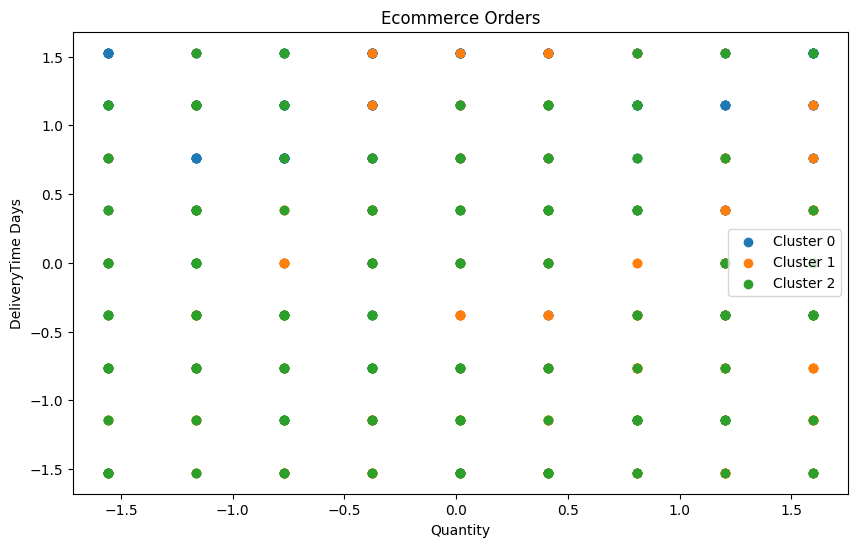

In [12]:
plt.figure(figsize=(10,6))
for i in np.unique(label):
    plt.scatter(scalar_data[label==i,2],scalar_data[label==i,3],label=f'Cluster {i}')
plt.legend()
plt.xlabel("Quantity")
plt.ylabel("DeliveryTime Days")
plt.title("Ecommerce Orders")
plt.show()